# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Keikiet Pham

Vem du har presenterat för: Adrian och Sebastian

Datum då du presenterade: 8/5 - 2024

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

/Users/keikietpham/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model = ResNet50(weights='imagenet', pooling='max')

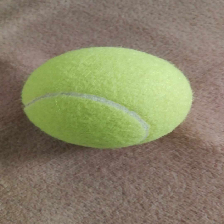

In [6]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [7]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [8]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

# 1. Take some pictures yourself and predict their class.

In [28]:
# Load the images
img_path_einstein = 'einstein.jpg'
img_path_oxe = 'oxe.jpg'
img_path_sandal = 'sandal.jpg'

img_einstein = image.load_img(img_path_einstein, target_size=(224,224))
img_oxe = image.load_img(img_path_oxe, target_size=(224,224))
img_sandal = image.load_img(img_path_sandal, target_size=(224,224))

First Prediction:

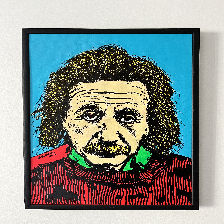

In [29]:
# Visualize image
img_einstein

In [26]:
# Image pre-processing
x_einstein = image.img_to_array(img_einstein)
print(x_einstein.shape)
x_einstein = np.expand_dims(x_einstein, axis=0)
x_einstein = preprocess_input(x_einstein)
print(x_einstein.shape)

(4032, 3024, 3)
(1, 4032, 3024, 3)


In [27]:
# Predicting predict 1
preds = model.predict(x_einstein)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted: [('n04372370', 'switch', 0.07252624), ('n03532672', 'hook', 0.06253289), ('n03887697', 'paper_towel', 0.052557778)]


Second Prediction:

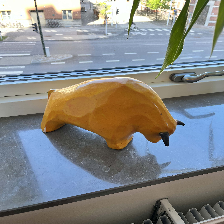

In [10]:
# Visualize image
img_oxe

In [11]:
# Image pre-processing
x_oxe = image.img_to_array(img_oxe)
x_oxe = np.expand_dims(x_oxe, axis=0)
x_oxe = preprocess_input(x_oxe)

In [12]:
# Predicting pred2
preds2 = model.predict(x_oxe)
print('Predicted:', decode_predictions(preds2, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted: [('n02930766', 'cab', 0.409011), ('n07717556', 'butternut_squash', 0.1196172), ('n07860988', 'dough', 0.08575209)]


Third Prediction

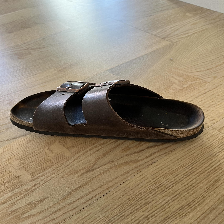

In [13]:
# Visualize image
img_sandal

In [14]:
# Image pre-processing
x_sandal = image.img_to_array(img_sandal)
x_sandal = np.expand_dims(x_sandal, axis=0)
x_sandal = preprocess_input(x_sandal)

In [15]:
# Predicting pred3
preds3 = model.predict(x_sandal)
print('Predicted:', decode_predictions(preds3, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted: [('n04133789', 'sandal', 0.6843777), ('n03680355', 'Loafer', 0.21681291), ('n02910353', 'buckle', 0.037930455)]


# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Generally, training models especially models for image recognition requires huge amounts of data and computation power which are things not easily accessable. Many CNN Image recognition models a structured in such way that they recognizes low-detail features and then combines them into high-level features. Since all objects are more or less combined low-detail features, it makes sense to reuse models that can identify these low-detail features.

3. Experimenting with parameters & augments

In [ ]:
# create the base pre-trained model
base_model =  ResNet50(weights='imagenet', include_top=False)

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# add a global spatial average pooling layer
model_add = base_model.output
model_add = MaxPooling2D(pool_size=3, strides=None, padding='valid')(model_add)
# add a dense layer
model_add = Dense(1024, activation='relu')(model_add)

# new model to be trained
model = Model(inputs=base_model.input, outputs=model_add)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.trainable=False

In [16]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)